In [38]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path

#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)
with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [39]:
target_user_list = ["@BBCNews", "@CBS", "@CNN", "@foxnews","@nytimes"]
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    for user in target_user_list:
        counter = 1
        public_tweets = api.user_timeline(user, page = x)

        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
          
            # Add to counter 
            counter = counter + 1


In [11]:
#convert sentiment list into dataframe object
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#reorder columns in dataframe
sentiments_pd = sentiments_pd[['User','Date','Tweet','Tweets Ago','Compound','Negative','Neutral','Positive']]

sentiments_pd

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
0,@BBCNews,Mon Jan 15 20:35:59 +0000 2018,RT @BBCScotlandNews: Hundreds of jobs are set ...,1,0.2500,0.917,0.000,0.083
1,@BBCNews,Mon Jan 15 20:21:05 +0000 2018,RT @BBCSport: Chelsea's £1bn development of St...,2,0.0000,1.000,0.000,0.000
2,@BBCNews,Mon Jan 15 19:31:52 +0000 2018,RT @BBCBusiness: What does the #Carillion coll...,3,-0.4939,0.802,0.198,0.000
3,@BBCNews,Mon Jan 15 19:29:39 +0000 2018,RT @BBCNewsbeat: Cyrille Regis was an inspirat...,4,0.5267,0.825,0.000,0.175
4,@BBCNews,Mon Jan 15 18:53:57 +0000 2018,Rape case collapses after 'cuddling' photos em...,5,-0.7845,0.465,0.535,0.000
5,@BBCNews,Mon Jan 15 18:11:51 +0000 2018,Carillion collapse: Ministers hold emergency m...,6,-0.7003,0.463,0.537,0.000
6,@BBCNews,Mon Jan 15 18:11:51 +0000 2018,Westminster attacker 'took steroids' before te...,7,-0.7964,0.458,0.542,0.000
7,@BBCNews,Mon Jan 15 17:43:32 +0000 2018,Steven Seagal denies Bond girl assault https:/...,8,-0.7650,0.431,0.569,0.000
8,@BBCNews,Mon Jan 15 17:22:12 +0000 2018,Barry Bennell: Ex-coach 'told me his cancer wa...,9,-0.6597,0.672,0.328,0.000
9,@BBCNews,Mon Jan 15 17:20:09 +0000 2018,RT @BBCBreaking: Cranberries lead singer Dolor...,10,-0.5574,0.841,0.159,0.000


In [12]:
# save sentiment data to csv
sentiments_pd.to_csv("TwitterMoodSentiment.csv")

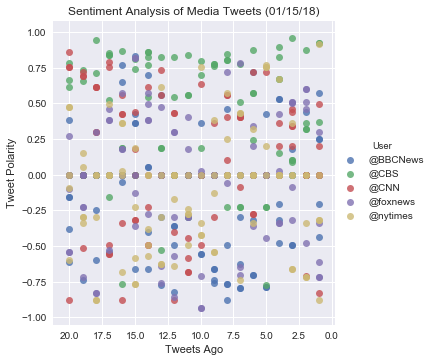

In [48]:
#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#sentiments_pd_grouped.count().head()
#for user in sentiments_pd_grouped["User"]:
#plt.scatter(sentiments_pd_grouped["Tweets Ago"],sentiments_pd_grouped["Compound"])
#plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
#plt.legend(sentiments_pd["User"])
#plt.ylabel("Tweet Polarity")
#plt.xlabel("Tweets Ago")
#plt.show()

sns.lmplot("Tweets Ago", "Compound", data=sentiments_pd, hue='User', fit_reg=False)
sns.plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
sns.plt.ylabel("Tweet Polarity")
sns.plt.xlabel("Tweets Ago")
sns.plt.gca().invert_xaxis()
sns.plt.show()


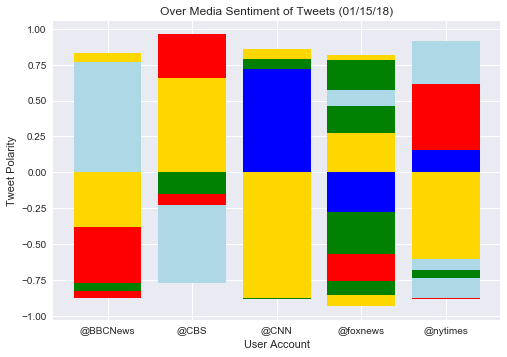

In [50]:
#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
plt.bar(sentiments_pd['User'], sentiments_pd['Compound'],color=["lightblue", 'green', 'red', 'blue', 'gold'] )
sns.plt.title("Over Media Sentiment of Tweets (%s)" % (time.strftime("%x")))
sns.plt.ylabel("Tweet Polarity")
sns.plt.xlabel("User Account")
plt.show()

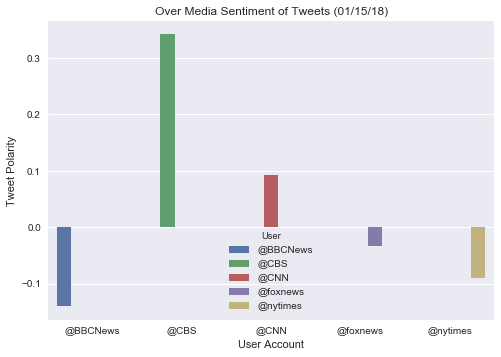

In [51]:
sns.barplot("User", "Compound", data=sentiments_pd, hue='User',ci=None)
sns.plt.title("Over Media Sentiment of Tweets (%s)" % (time.strftime("%x")))
sns.plt.ylabel("Tweet Polarity")
sns.plt.xlabel("User Account")
sns.plt.show()
